# Splines

It should be clear at this point that if we want to approximate a function with an interpolating polynomial then selecting the nodes as something like Chebyshev points is essential.  However, data from many sources comes to us at node intervals that we do not control.  Most often, this is at regularly spaced intervals.  How should we interpolate between such data?  In most cases, the answer to this is that you should use splines.  Interpolation using splines is a generalization of "connecting the dots".  The most simple form, a linear interpolating spline, involves just connecting the data points with straight lines to find intermediate values.  This is illustrated below using a set of uniformly spaced points with the underlying function $f(x)=e^{-x^2}$.

<img src="./img/linspline.svg" width="400">

This is also a common technique for interpolating between values in a table.  An obvious question is: Is this the best we can do with using different polynomials between each set of points (i.e. a function defined *piecewise*)?  Aside from the issue of absolute errors in the interpolation (i.e. $|f(x)-s_i(x)|$ where $s_i(x)$ is the polynomial defined on the interval between points $i$ and $i+1$), a linear interpolatory spline is not differentiable at the node points, typically called **knots** when discussing splines, which could be problematic for many applications.  The kinks are also visually unappealing in the plot.  It turns out that it is not that difficult to construct an interpolating spline that is continuous in both first and second derivatives at the knots by using piecewise cubic polynomial functions.

## Cubic interpolatory splines

To be more specific, we are looking for a set of cubic polynomials $\{ S_j(x) \}_{j=0}^{n-1}$ where our interpolatory function  

$$S(x) = S_j(x)\qquad \text{if}\quad x_j \leq x \leq x_{j+1}.$$

This is illustrated below:

<img src="./img/cubicspline.svg" width="400">

We want $S(x)$ to not only be a continuous interpolation function, but continuously differentiable at least two times.  This imposes the following four conditions at each interior node:

1. $S_j(x_j)=f(x_j),$

2. $S_j(x_{j+1})=S_{j+1}(x_{j+1}),$ which means that $S_j(x_{j+1})=f(x_{j+1})$ making use of the first condition,

3. $S_j'(x_{j+1})=S_{j+1}'(x_{j+1}),$

4. $S_j''(x_{j+1})=S_{j+1}''(x_{j+1}).$

Each of the $S_j(x)$ is a cubic polynomial which we will write in the form  

```{math}
:label: splinepiece
S_j(x) = a_j+b_j(x-x_j)+c_j(x-x_j)^2+d_j(x-x_j)^3.
```

Each of the $n-1$ different $S_j$ requires four parameters so we will need $4(n-1)$ conditions to determine them.  As the last two conditions above only apply to the interior points, we are short two conditions overall.  These are filled in with two boundary conditions.  There are a number of possibilities for the boundary conditions.  A few common choices are

- $S''(x_0)=0$ and $S''(x_n)=0.$  This choice is called a *natural* cubic interpolatory spline.

- $S'(0) = A$ and $S'(x_n)=B$ with $A$ and $B$ specified.  This choice is called a *clamped* cubic interpolatory spline.

- $S_0'''(x_{1})=S_1'''(x_{1})$ and $S_{n-2}'''(x_{n-1})=S_{n-1}'''(x_{n-1})$.  This choice is called *not-a-knot* as it, together with the continuity of the lower derivatives already required at $x_1$ and $x_{n-1}$, forces $S_0(x)\equiv S_1(x)$ and $S_{n-2}(x)\equiv S_{n-1}(x)$.

Constructing the interpolatory spline requires using the above conditions to find the parameters in Equation {eq}`splinepiece` for all $j$.

Condition 1 can be immediately exploited to find $a_j$ by noting that evaluating Equation {eq}`splinepiece` at $x_j$ gives $S_j(x_j)=a_j$ and combining this with the first condition gives  

```{math}
:label: ajsolution
a_j=f(x_j),\qquad\qquad j=0,1,...,n-1.
```
  

We now evaluate $S_j$ and $S_{j+1}$ at $x_{j+1}$ and set them equal, as required by condition 2, to get  

```{math}
:label: a_eqn
\begin{align}
a_{j+1} &= S_{j+1}(x_{j+1}) \\
&= S_j(x_{j+1}) \\
&= a_j + b_j(x_{j+1}-x_j) + c_j (x_{j+1}-x_j)^2 + d_j(x_{j+1}-x_j)^3\\
&= a_j + b_j h_j + c_j h_j^2 + d_j h_j^3,\\
& \mathrm{and} \qquad\qquad j=0,...,n-2,
\end{align}
```
 
where to simplify the notation going forward, we define  

$$ h_j = (x_{j+1}-x_j). $$

We have not yet applied condition 1 and 2 to $S_{n-1}(x_{n+1})$.  However, if we define a "dummy" polynomial $S_n$ with $a_n=f(x_n)$ then {eq}`a_eqn` can be extended to $j=n-1$.

Before making use of the conditions on the derivatives of $S(x)$ note that 

$$
\begin{align}
S'_j(x) &= b_j + 2 c_j(x-x_j) + 3 d_j(x-x_j)^2,\\
S''_j(x) &= 2 c_j + 6 d_j(x-x_j).
\end{align}
$$

As as this implies that $S_{0}'(x)=b_0$ it should be clear that a *clamped* spline boundary condition explicitly determines $b_0$ as the (given) derivative at $x_0$.  Similarly, a *natural* spline boundary condition explicity determines $c_0=0$.

Continuity of the derivative, condition 3, then implies

```{math}
:label: b_eqn
\begin{align}
b_{j+1} &= S_{j+1}'(x_{j+1}) \\
& = S_j'(x_{j+1}) \\
& = b_j + 2 c_j (x_{j+1}-x_j) + 3d_j(x_{j+1}-x_j)^2\\
&= b_j + 2c_j h_j + 3d_j h_j^2, \\
&  \qquad\qquad  \qquad\qquad \qquad\qquad j=0,...,n-2.
\end{align}
```

To extend this equation to $j=n-1$ we must make use of a boundary condition at $x_{j+1}$.  If we are constructing a *clamped* spline this would determine the derivative, and hence $b_{n}$ for the "dummy" polynomial $S_n$ if we extend this equation to $j=n-1$.  A *natural* spline instead just extends this equation to $j=n-1$ by allowing it to effectively determine the derivative $S_j'(x_{j+1})$ once we have determined the other parameters on the right hand side. 

Similarly, continuity of the second derivative, condition 4, then implies

```{math}
:label: c_eqn
\begin{align}
   c_{j+1} &= S_{j+1}''(x_{j+1}) \\
   &= S_j''(x_{j+1}) \\
   & = 2 c_j + 6d_j(x_{j+1}-x_j)\\
   &= 2c_j + 3d_j h_j, \\
   &   \qquad\qquad \qquad\qquad \qquad\qquad  \mathrm{and\,\,} j=0,...,n-2.
\end{align}
```

We can again extend this equation to $j=n-1$ for a *natural* spline by replacing $c_{j+1}$ with zero (the second derivative at $x_{j+1}$).  The extension for the other boundary conditions are slightly more complicated, but not much.  You will construct these in the problems.

Equations {eq}`a_eqn`, {eq}`b_eqn`, and {eq}`c_eqn` form a coupled linear set of equations for the parameters $b_j$, $c_j$, and $d_j$ given that we know $a_j$ (from {eq}`ajsolution`) and $h_j$.  We can simplify these equations further by eliminating $b_j$ and $d_j$ to get a set of equations for the $c_j$ alone (and then once these are known they can be used to deterime the other parameters).  We first eliminate the $d_j$ by rearranging Equation {eq}`c_eqn`,  


```{math}
:label: djsolution
d_j = \frac{1}{3h_j}(c_{j+1}-c_j).
```

Substituting this into {eq}`a_eqn` then gives 

$$a_{j+1}=a_j + b_j h_j + \frac{h_j^2}{3}(2c_j+c_{j+1}),$$ 

which can be solved to give the $b_j$ in terms of the $c_j$ to get  

```{math}
:label: bjsolution
b_j=\frac{1}{h_j}(a_{j+1}-a_j)-\frac{h_j}{3}(2c_j+c_{j+1}).
```


Substituting {eq}`bjsolution` and {eq}`djsolution` into {eq}`b_eqn` gives  

$$ h_{j+1} c_{j+2} +2(h_{j+1} + h_j) c_{j+1}+h_j c_j = \frac{3}{h_{j+1}}(a_{j+2}-a_{j+1})-\frac{3}{h_j}(a_{j+1}-a_j),\qquad j=0,1,...n-2$$

This is a set of equations (for different $j$) and it is more useful to center it around $c_j$ than $c_{j+1}$. i.e. use the equation for $j\rightarrow j-1$

>
> $$ h_j c_{j+1} +2(h_j + h_{j-1}) c_j+h_{j-1} c_{j-1} = \frac{3}{h_j}(a_{j+1}-a_j)-\frac{3}{h_{j-1}}(a_j-a_{j-1}), \qquad j=1,2,...n-1$$
>

and using a boundary condition for $j=0$.  We can rewrite these equation and the boundary contions into a matrix equation as

```{math}
:label: cjsolution
\begin{align}
  \left[ {\begin{array}{cccccc}
    1 & 0 & 0 & 0 & \cdots & 0\\
    h_0 & 2(h_0+h_1) & h_1 & 0 &\cdots & 0\\
    0 & h_1 & 2(h_1+h_2) & h_2 & 0 &\vdots \\
    \vdots & \ddots & \ddots & \ddots & \ddots & 0\\
    0 & \cdots & 0 & h_{n-1} & 2(h_{n-1}+h_{n-2}) & h_{n-2}\\
    0 & \cdots & 0 & 0 & h_{n-2} & 2(h_{n-2}+h_{n-1})\\
  \end{array} } \right]
  \left[ {\begin{array}{c}
  c_0 \\
  c_1 \\
  c_2 \\
  \vdots \\
  c_{n-2} \\
  c_{n-1} \\
  \end{array}} \right] =\\
  \qquad\qquad\qquad
  \left[ {\begin{array}{c}
  0 \\
  \frac{3}{h_1}(a_2-a_1)-\frac{3}{h_0}(a_1-a_0)\\
  \vdots \\
  \vdots \\
  \frac{3}{h_{n-2}}(a_{n-1}-a_{n-2})-\frac{3}{h_{n-3}}(a_{n-2}-a_{n-3})\\
  \frac{3}{h_{n-1}}(f(x_n)-a_{n-1})-\frac{3}{h_{n-2}}(a_{n-1}-a_{n-2})\\
  \end{array}} \right]
\end{align}
```

for the *natural* cubic spline (the first equation is the boundary condition that sets $c_0=0$ and the last equation uses the "dummy" polynomial extension of the equations where $c_n=0$). This is a diagonally dominant tridiagonal system which means that solving this system via Gaussian elimination/LU factorization without pivoting will provide a unique solution and will be numerically stable.  In addition, this can be solved in $\mathcal{O}(n)$ flops using the [Thomas algorithm](https://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm) discussed in the chapter on linear systems.

So to construct our interpolatory spline $S(x)$ (or, in other words to construct the set $\{ S_j(x) \}_{j=0}^{n-1}$) we  

1. Use Eq.{eq}`ajsolution` to obtain the $a_j$.

2. Solve the linear system in Eq.{eq}`cjsolution` to obtain the $c_j$.

3. Use Eq.{eq}`bjsolution` and Eq.{eq}`djsolution`, potentially making use of boundary condtions, to obtain the $b_j$ and $d_j$.

Once we have all the paramaters, to evaluate $S(x)$ at a specific point $x$ we  

1. Determine which interval $[x_j,x_j+1)$ the value $x$ falls in.  

2. Evaluate and return $S_j(x)$. 

## Errors in Cubic Interpolatory Splines

As usual, we wish to ensure our errors are bounded and have some form of this error bound so it is clear what measures may, or may not, improve (or worsen) these errors.  This is provided by the following theorem which summarizes the results of [Hall and Meyer](https://doi.org/10.1016/0021-9045(76)90040-X) which also provides bounds on the derivatives.

**Theorem** Given $f\in C^4[a,b]$, $\max_{a\leq x \leq b} |f^{(4)}(x)|\leq M$, nodes at   

$$ a = x_0 < x_1 < \cdots < x_n=b, $$

then if $S(x)$ is the cubic interpolatory spline with clamped end conditions  

$$\begin{align}
\max_{a\leq x \leq b}|f(x)-S(x)| &\leq \frac{5 M}{384}(\max_{a\leq x \leq b} h_j)^4,\\
\max_{a\leq x \leq b}|f'(x)-S'(x)| &\leq \frac{M}{24}(\max_{a\leq x \leq b} h_j)^3,\\
\max_{a\leq x \leq b}|f''(x)-S''(x)| &\leq \frac{3 M}{8}(\max_{a\leq x \leq b} h_j)^2.
\end{align}
$$

As we can see, splines can be reasonably good for obtaining approximations to derivatives of the underlying function as well.

## Using Splines

Implementing splines requires solving a tridiagonal system.  While not hard to do, it is usually not worth the effort to implement all of this yourself.  Instead, you should use a library.  [SciPy contains an implementation for natural cubic interpolatory splines](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html) which we illustrate the use of below.  

We first import the necessary libraries:

In [1]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt

The first call to `interp1d` creates an instance of the class which sets up the interpolatory spline based on the provided data points.  The instance of this class defines a __call__ method which can later be treated like a function which interpolates between known data values to obtain unknown value. Behavior at the boundary can be specified at instantiation time. The default is actually a linear interpolatory spline but contains options to get a cubic.

In [2]:
from scipy.interpolate import interp1d
import numpy as np

x = np.linspace(-2, 2, num=9, endpoint=True)
y = np.exp(-x**2)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

Now that we have the splines set up, we can make use of them to, for example, plot out the interpolatory function:

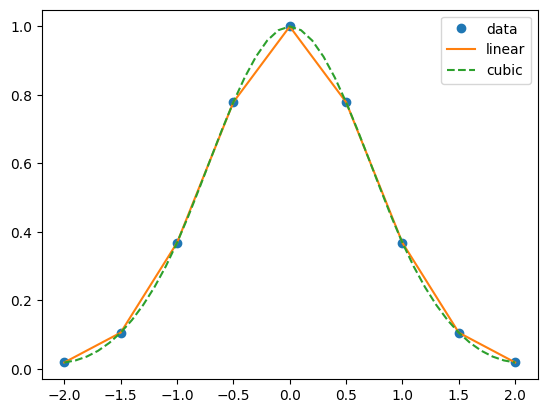

In [3]:
xnew = np.linspace(-2, 2, num=41, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()